In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import torch

from mfbml.methods.mfdnnbnn import MFDNNBNN
from mfbml.problem_sets.torch_problems import Forrester1b, MengCase1

In [2]:
# define function
func = MengCase1(noise_std=0.05)
num_dim = 1

# use multi-fidelity forrester function to test the performance of the MFDNNBNN class
lf_samples = torch.linspace(0, 1, 201).reshape(-1, 1)
hf_samples = lf_samples[::10]  # sample every 5 points


# generate responses
lf_responses = func.lf(lf_samples)
hf_responses = func.hf(hf_samples)

In [3]:
# create the configuration of the low-fidelity model
lf_configure = {
    "in_features": 1,
    "hidden_features": [20, 20],
    "out_features": 1,
    "activation": "Tanh",
    "optimizer": "Adam",
    "lr": 0.001,
    "weight_decay": 0.000001,
    "loss": "mse",
}
# create the configuration of the high-fidelity model
hf_configure = {
    "in_features": 1,
    "hidden_features": [50, 50],
    "out_features": 1,
    "activation": "Tanh",
    "lr": 0.001,
    "sigma": 0.05,
}
# create the MFDNNBNN object
mfdnnbnn = MFDNNBNN(
    lf_configure=lf_configure,
    hf_configure=hf_configure,
    beta_optimize=False,
    beta_bounds=[-5, 5],
)


samples = {"lf": lf_samples, "hf": hf_samples}

responses = {"lf": lf_responses, "hf": hf_responses}

# lf train config
lf_train_config = {"batch_size": None, "num_epochs": 20000, "print_iter": 100}
hf_train_config = {
    "num_epochs": 50000,
    "sample_freq": 100,
    "print_info": True,
    "burn_in_epochs": 20000,
}

# train the MFDNNBNN object
mfdnnbnn.train(
    samples=samples,
    responses=responses,
    lf_train_config=lf_train_config,
    hf_train_config=hf_train_config,
)
# predict the MFDNNBNN object
y, epistemic, total_unc, aleatoric = mfdnnbnn.predict(
    x=torch.linspace(0, 1, 1000).reshape(-1, 1)
)
# lf prediction
lf_y = mfdnnbnn.lf_model.forward(torch.linspace(0, 1, 1000).reshape(-1, 1))

epoch:  99 loss:  0.47779086232185364
epoch:  199 loss:  0.4776541590690613
epoch:  299 loss:  0.4775175154209137
epoch:  399 loss:  0.47738897800445557
epoch:  499 loss:  0.4772653877735138
epoch:  599 loss:  0.4771338999271393
epoch:  699 loss:  0.47696417570114136
epoch:  799 loss:  0.47666501998901367
epoch:  899 loss:  0.4758199155330658
epoch:  999 loss:  0.47064080834388733
epoch:  1099 loss:  0.4418101906776428
epoch:  1199 loss:  0.4193958342075348
epoch:  1299 loss:  0.3942573070526123
epoch:  1399 loss:  0.3598930537700653
epoch:  1499 loss:  0.2941421866416931
epoch:  1599 loss:  0.2337806075811386
epoch:  1699 loss:  0.20169734954833984
epoch:  1799 loss:  0.13836754858493805
epoch:  1899 loss:  0.01666848547756672
epoch:  1999 loss:  0.012953182682394981
epoch:  2099 loss:  0.011173082515597343
epoch:  2199 loss:  0.009644702076911926
epoch:  2299 loss:  0.008371328935027122
epoch:  2399 loss:  0.007305610924959183
epoch:  2499 loss:  0.006434314884245396
epoch:  2599 los

/home/jiaxiangyi/Documents/mfbml/mfbml/methods/bnn.py:170: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  V.mul_(alpha).addcmul_(1 - alpha, d_p, d_p)


epoch:   101/50000
nll_loss: 2545.039, prior_loss: 2534.227, total: 5079.266
noise: 0.050
epoch:   201/50000
nll_loss: 2541.227, prior_loss: 2555.913, total: 5097.140
noise: 0.050
epoch:   301/50000
nll_loss: 2531.543, prior_loss: 2582.624, total: 5114.167
noise: 0.050
epoch:   401/50000
nll_loss: 2524.357, prior_loss: 2611.211, total: 5135.567
noise: 0.050
epoch:   501/50000
nll_loss: 2517.649, prior_loss: 2641.212, total: 5158.861
noise: 0.050
epoch:   601/50000
nll_loss: 2514.066, prior_loss: 2680.199, total: 5194.265
noise: 0.050
epoch:   701/50000
nll_loss: 2520.667, prior_loss: 2714.696, total: 5235.363
noise: 0.050
epoch:   801/50000
nll_loss: 2509.696, prior_loss: 2747.674, total: 5257.370
noise: 0.050
epoch:   901/50000
nll_loss: 2505.648, prior_loss: 2781.341, total: 5286.989
noise: 0.050
epoch:  1001/50000
nll_loss: 2508.058, prior_loss: 2808.448, total: 5316.506
noise: 0.050
epoch:  1101/50000
nll_loss: 2504.906, prior_loss: 2839.594, total: 5344.500
noise: 0.050
epoch:  12

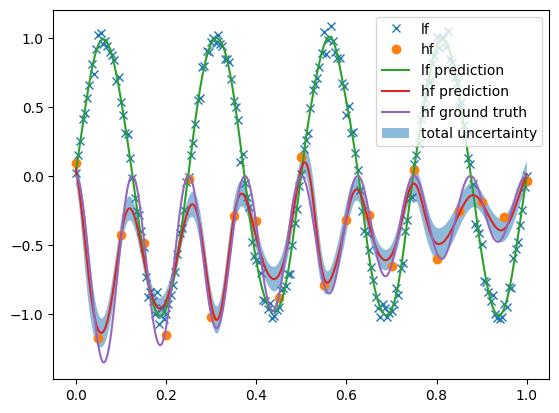

In [4]:
# print the prediction

# plot

plt.figure()
plt.plot(lf_samples, lf_responses, "x", label="lf")
plt.plot(hf_samples, hf_responses, "o", label="hf")
# plot lf prediction
plt.plot(
    torch.linspace(0, 1, 1000).numpy(), lf_y.detach().numpy(), label="lf prediction"
)
plt.plot(torch.linspace(0, 1, 1000).numpy(), y, label="hf prediction")
plt.plot(
    torch.linspace(0, 1, 1000).numpy(),
    func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy(),
    label="hf ground truth",
)
plt.fill_between(
    torch.linspace(0, 1, 1000).numpy(),
    (y - 2 * epistemic).reshape(-1),
    (y + 2 * epistemic).reshape(-1),
    alpha=0.5,
    label="total uncertainty",
)
plt.legend()
# plt.savefig("mfdnnbnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
# train a standard bnn to fit the data
from mfbml.methods.bnn import BNNWrapper


# create the model
model = BNNWrapper(
    in_features=1,
    hidden_features=[50, 50],
    out_features=1,
    activation="Tanh",
    lr=0.001,
    sigma=0.05,
)


# train the model
model.train(
    x=hf_samples,
    y=hf_responses,
    num_epochs=50000,
    sample_freq=100,
    burn_in_epochs=20000,
)

epoch:     1/50000
nll_loss: 1771.920, prior_loss: 2508.074, total: 4279.994
noise: 0.050
epoch:   101/50000
nll_loss: 520.793, prior_loss: 2554.528, total: 3075.321
noise: 0.050
epoch:   201/50000
nll_loss: 519.024, prior_loss: 2594.965, total: 3113.989
noise: 0.050
epoch:   301/50000
nll_loss: 521.927, prior_loss: 2635.003, total: 3156.930
noise: 0.050
epoch:   401/50000
nll_loss: 524.173, prior_loss: 2664.100, total: 3188.273
noise: 0.050
epoch:   501/50000
nll_loss: 523.078, prior_loss: 2702.288, total: 3225.366
noise: 0.050
epoch:   601/50000
nll_loss: 514.395, prior_loss: 2740.536, total: 3254.931
noise: 0.050
epoch:   701/50000
nll_loss: 530.667, prior_loss: 2776.691, total: 3307.359
noise: 0.050
epoch:   801/50000
nll_loss: 510.772, prior_loss: 2808.930, total: 3319.702
noise: 0.050
epoch:   901/50000
nll_loss: 511.768, prior_loss: 2855.209, total: 3366.977
noise: 0.050
epoch:  1001/50000
nll_loss: 508.204, prior_loss: 2897.738, total: 3405.941
noise: 0.050
epoch:  1101/50000
n

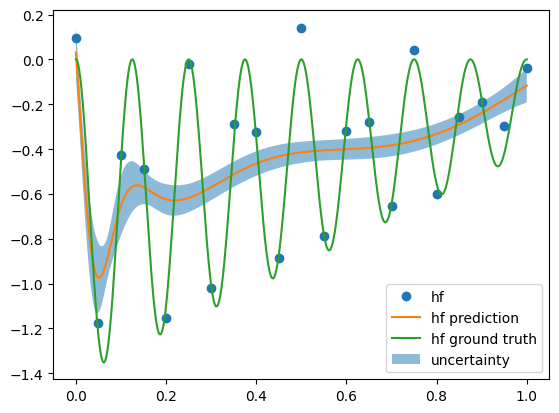

In [6]:
# predict the model
bnn_y, bnn_epistemic, bnn_total_unc, bnn_aleatoric = model.predict(
    x=torch.linspace(0, 1, 1000).reshape(-1, 1)
)

# plot
plt.figure()
plt.plot(hf_samples, hf_responses, "o", label="hf")
plt.plot(torch.linspace(0, 1, 1000).numpy(), bnn_y, label="hf prediction")
plt.plot(
    torch.linspace(0, 1, 1000).numpy(),
    func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy(),
    label="hf ground truth",
)
plt.fill_between(
    torch.linspace(0, 1, 1000).numpy(),
    (bnn_y - 2 * bnn_epistemic).reshape(-1),
    (bnn_y + 2 * bnn_epistemic).reshape(-1),
    alpha=0.5,
    label="uncertainty",
)
plt.legend()
# plt.savefig("bnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# try to get the accuracy metrics of the two models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for mfdnnbnn
print("mfdnnbnn")
print(
    "mse: ",
    mean_squared_error(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)
print(
    "r2: ",
    r2_score(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)
print(
    "mae: ",
    mean_absolute_error(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)

# for bnn
print("bnn")
print(
    "mse: ",
    mean_squared_error(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)
print(
    "r2: ",
    r2_score(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)
print(
    "mae: ",
    mean_absolute_error(
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)

mfdnnbnn
mse:  0.014892558058503275
r2:  0.8900314714021703
mae:  0.10066666869356479
bnn
mse:  0.097645566
r2:  0.2789727190484036
mae:  0.26900646


In [8]:
def nog_likelihood_function(
    pred: np.ndarray,
    real: np.ndarray,
    sigma: np.ndarray,
) -> np.ndarray:
    # calculate the negative log likelihood
    # pred: the predicted mean
    # real: the real value
    # sigma: the predicted standard deviation
    # return: the negative log likelihood

    # calculate the log likelihood
    nll = -0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * \
        ((real - pred) / sigma) ** 2

    return nll.sum()

In [9]:
# calculate the negative log likelihood
print("mfdnnbnn")
print(
    "nll: ",
    nog_likelihood_function(
        y,
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.05)
        .detach()
        .numpy(),
        total_unc,
    ),
)
print("bnn")
print(
    "nll: ",
    nog_likelihood_function(
        bnn_y,
        func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1), noise_hf=0.05)
        .detach()
        .numpy(),
        bnn_total_unc,
    ),
)

mfdnnbnn
nll:  -213.32441487961864
bnn
nll:  -12379.658


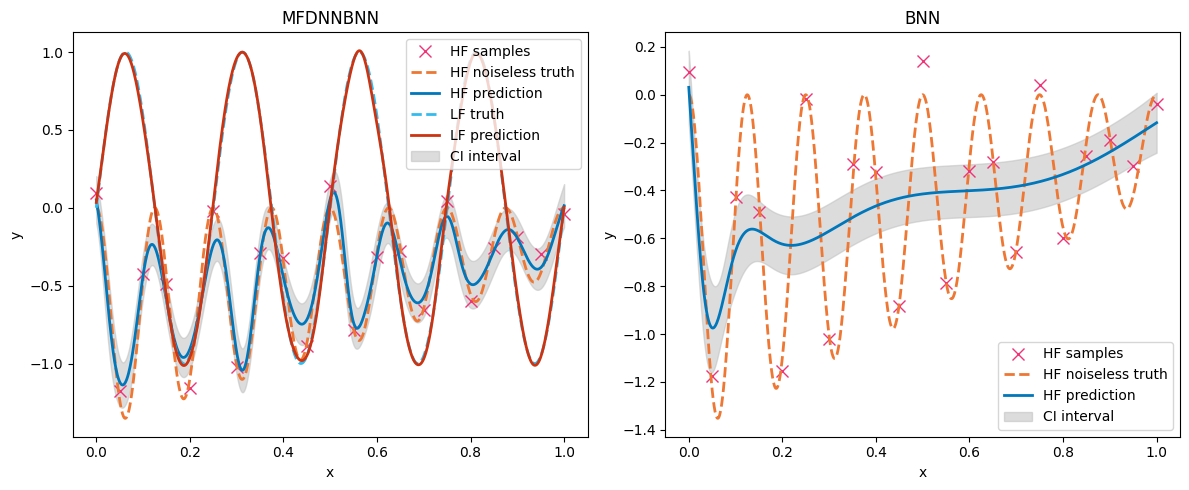

In [10]:
# plot results of mfrbfgp and gpr in one figure
test_x = torch.linspace(0, 1, 1000).reshape(-1, 1).numpy()
test_hy = (
    func.hf(torch.linspace(0, 1, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy()
)
test_ly = (
    func.lf(torch.linspace(0, 1, 1000).reshape(-1, 1),
            noise_lf=0.0).detach().numpy()
)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[0].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[0].plot(test_x, y, "-", color="#0077BB", linewidth=2, label="HF prediction")
ax[0].plot(test_x, test_ly, "--", color="#33BBEE",
           linewidth=2, label="LF truth")
ax[0].plot(
    test_x,
    lf_y.detach().numpy(),
    "-",
    color="#CC3311",
    linewidth=2,
    label="LF prediction",
)
# ax[0].plot(sample_x["lf"], sample_y["lf"], "x", label="lf samples")
ax[0].fill_between(
    test_x.flatten(),
    (y - 2 * total_unc).flatten(),
    (y + 2 * total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[0].legend()
ax[0].set_title("MFDNNBNN")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
# for gpr
ax[1].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[1].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[1].plot(test_x, bnn_y, "-", color="#0077BB",
           linewidth=2, label="HF prediction")
ax[1].fill_between(
    test_x.flatten(),
    (bnn_y - 2 * bnn_total_unc).flatten(),
    (bnn_y + 2 * bnn_total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[1].legend()
ax[1].set_title("BNN")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
plt.tight_layout()
plt.savefig("mf_dnn_bnn_known_noise.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_dnn_bnn_known_noise.png", dpi=300, bbox_inches="tight")
plt.show()